In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from google.colab.patches import cv2_imshow
from scipy.ndimage import convolve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img = "/content/drive/MyDrive/Colab Notebooks/VISIONS & PERSPECTIVE/13esercizio/daniel.jpeg"

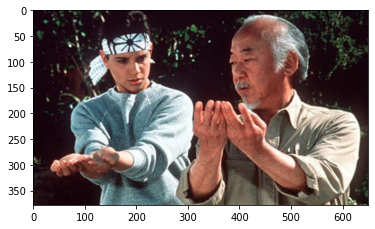

In [ ]:
image= imread(img)
plt.imshow(image)

In [ ]:
numLevels = 8  #number of levels in my final gaussian pyramid : s.t. numLevels is dividable for 4, in order not to have errors during the subplotting

###Gaussian Pyramids###

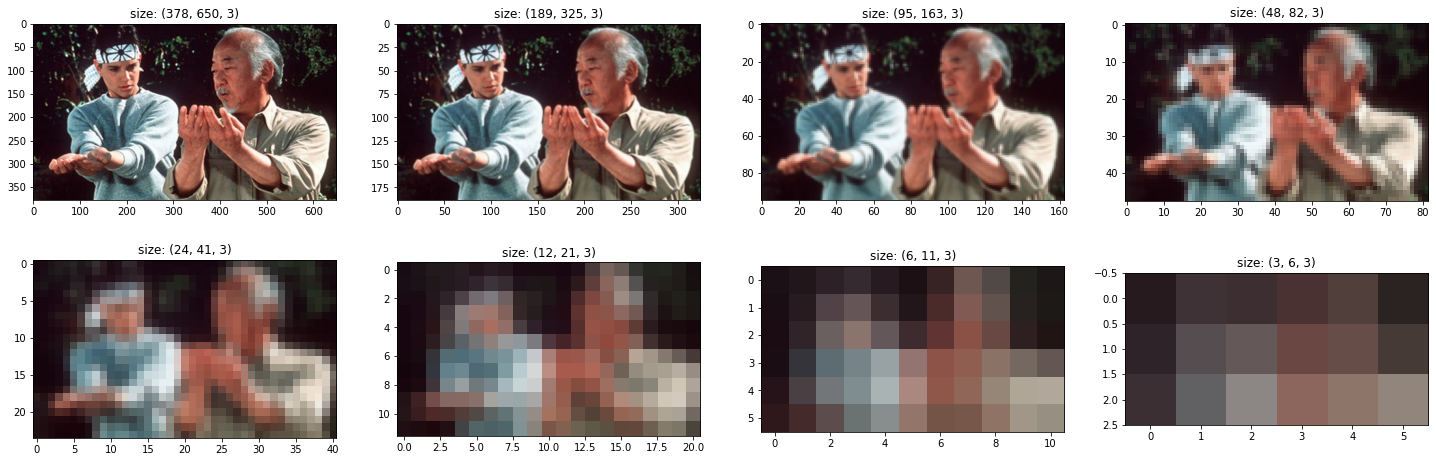

In [ ]:
def subsampling_box(img):
    blur = cv2.GaussianBlur(img, (5,5), 0)  #boxed = cv2.boxFilter(img, 50, (3,3))
    sub = blur[::2, ::2]
    return sub

imgg = image

subsampled = [image]

#in order to have 'numLevels' images at the end, we have to apply 'numLevels-1' times the fne subsampling_box
for i in range(numLevels-1):
    new = subsampling_box(imgg)
    subsampled.append(new)
    imgg = new

m=numLevels/4         
plt.figure(figsize=(25,8))
for i in range(len(subsampled)):
    plt.subplot(m,4,i+1), plt.imshow(subsampled[i]), plt.title("size: " + str(subsampled[i].shape))  #4 images per row in this subplotting
plt.show()

###Laplacian Pyramids###

Through the residuals, starting from the most downsampled image, it is possible to reconstruct the original image by looping: 1) upsample; 2) sum with residual. //Residual=difference between 2 levels (x es. original image - blurred one)//

8
8


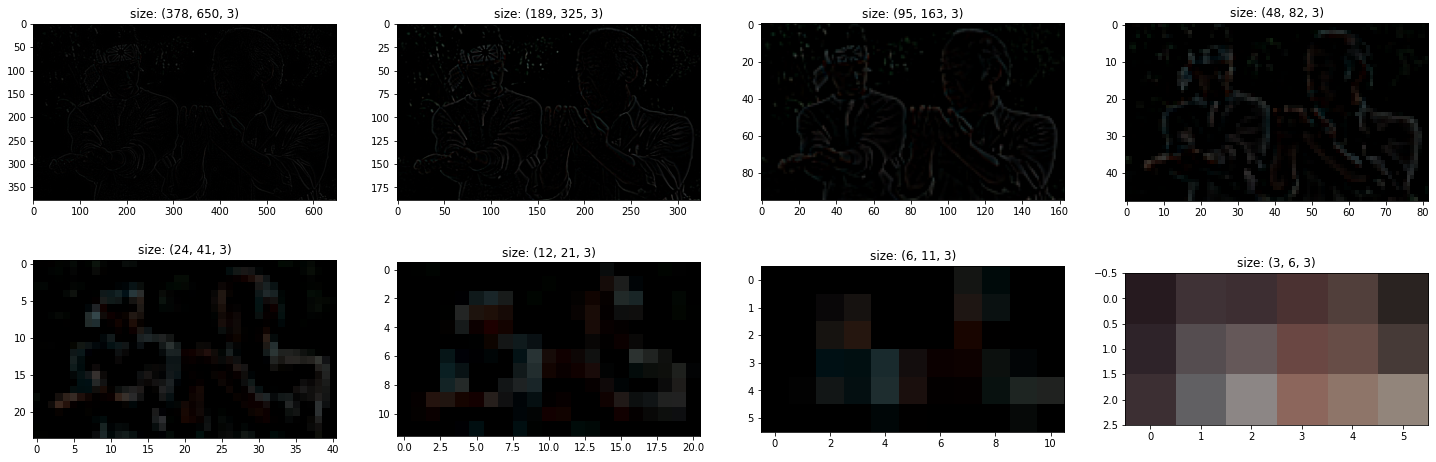

In [ ]:
def subsampling_box(img):
    blur = cv2.GaussianBlur(img, (5,5), 0)  #boxed = cv2.boxFilter(img, 50, (3,3))
    res = cv2.subtract(img, blur)
    laplacian_pyr.append(res)
    sub = blur[::2, ::2]
    gaussian_pyr.append(sub)
    return sub

imgg = image

gaussian_pyr = [image]
laplacian_pyr = []

for i in range(numLevels-1):
    new = subsampling_box(imgg)  #computes the upper level of the gaussian_pyr
    imgg = new

#in order to compute the last level of the laplacian pyramid:
laplacian_pyr.append(gaussian_pyr[-1])

print(len(gaussian_pyr))
print(len(laplacian_pyr))

m=numLevels/4         
plt.figure(figsize=(25,8))
for i in range(len(laplacian_pyr)):
    #print(i)
    plt.subplot(m,4,i+1), plt.imshow(laplacian_pyr[i]), plt.title("size: " + str(laplacian_pyr[i].shape))  #4 images per row in this subplotting
plt.show()

Reconstruction of the original image, given the gaussian_pyramid and the respective residuals.

the first column is the image of the gaussian pyramid (level N), that still has to be upsampled and blurred, 
in order to be added to the residual (central column). As result of this addition, we have the last column: 
it is the lower level N-1 of the gaussian pyramid


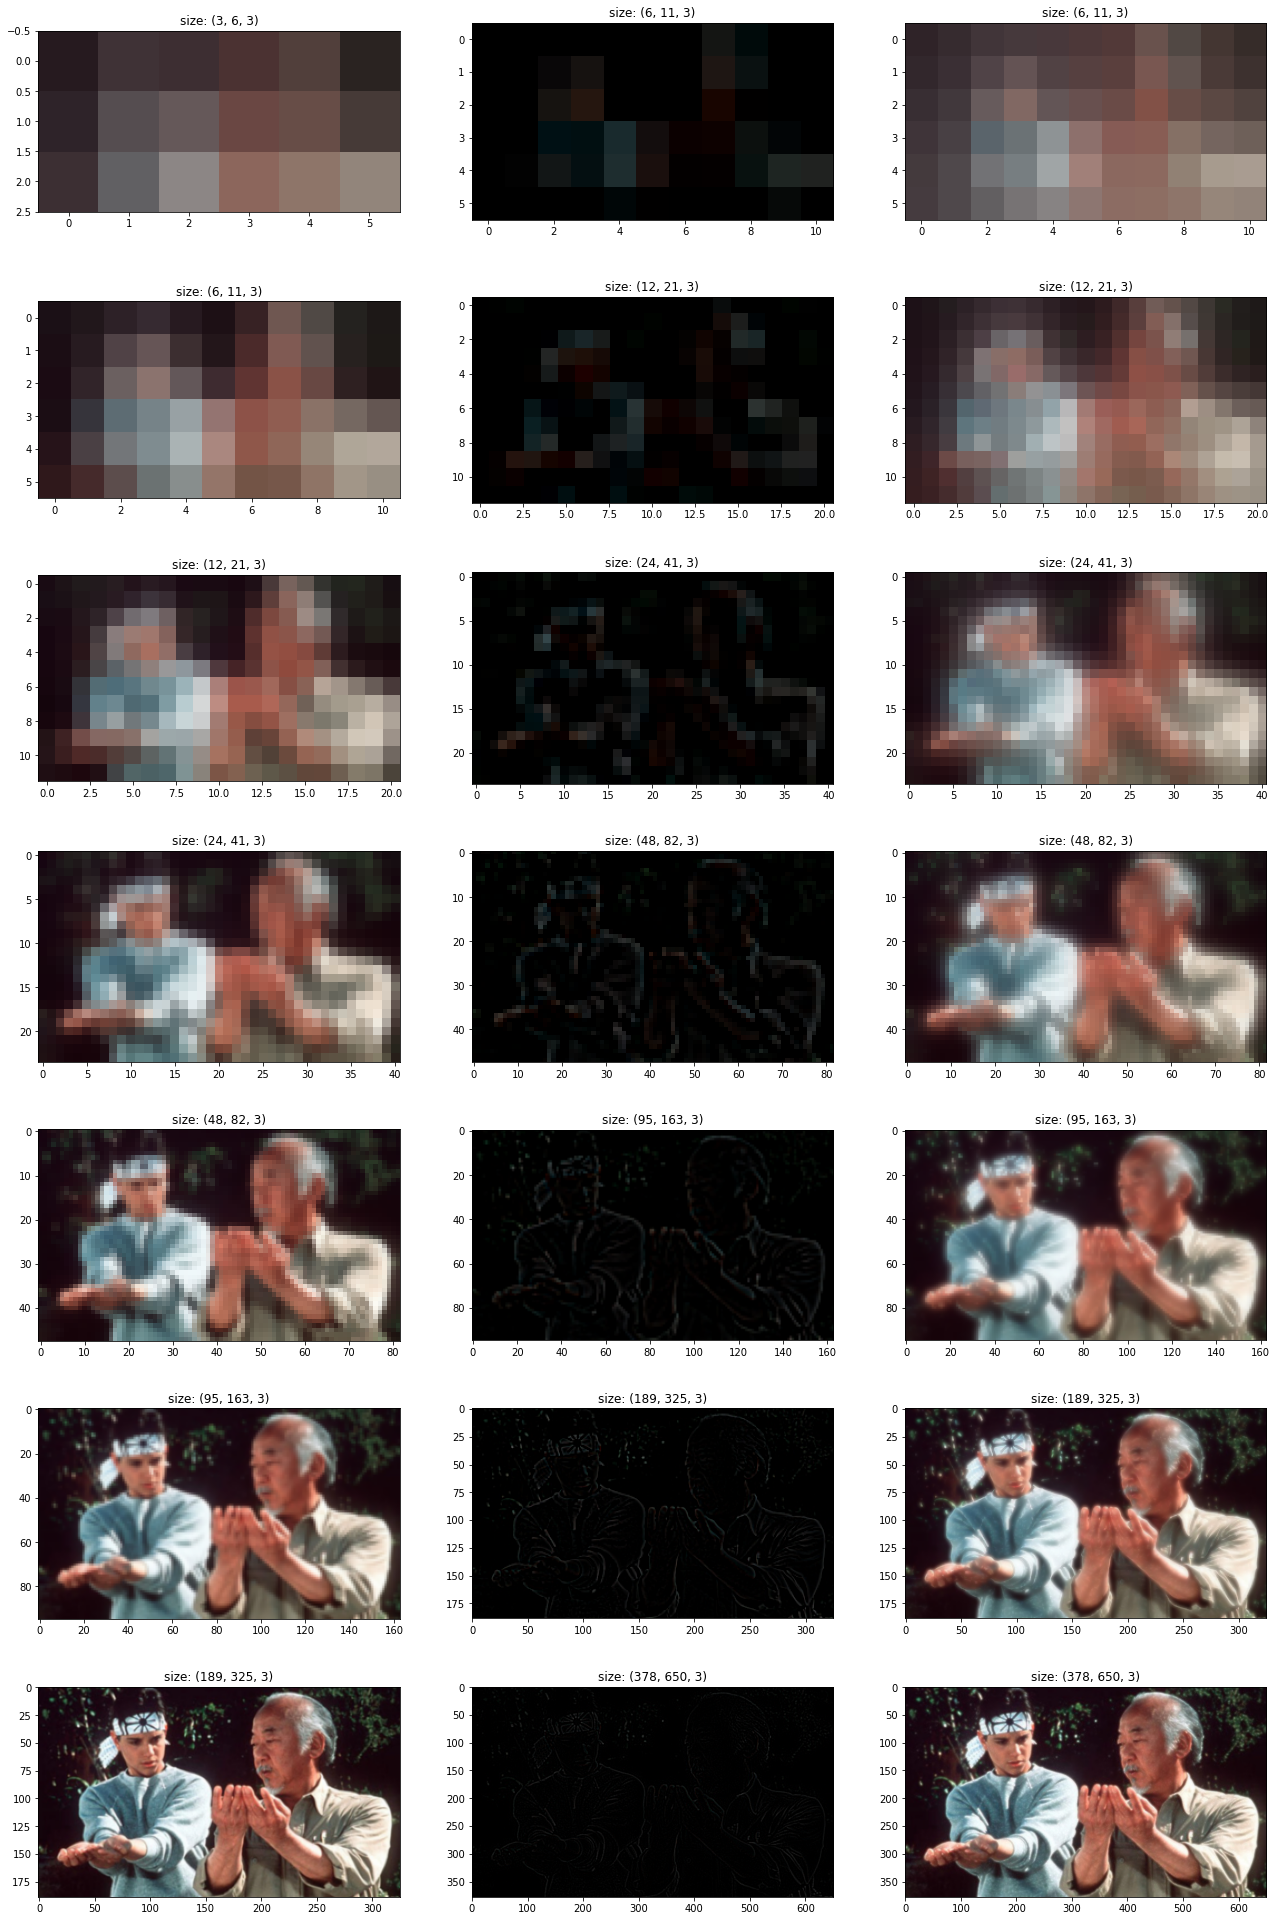

In [ ]:
print("the first column is the image of the gaussian pyramid (level N), that still has to be upsampled and blurred, ")
print("in order to be added to the residual (central column). As result of this addition, we have the last column: ")
print("it is the lower level N-1 of the gaussian pyramid")
numLevels = len(laplacian_pyr)
m = numLevels-1

n = 0
plt.figure(figsize=(22,35))
for i in range(numLevels-1, 0, -1):
        
    size = (laplacian_pyr[i-1].shape[1], laplacian_pyr[i-1].shape[0])

    g = cv2.pyrUp(gaussian_pyr[i], dstsize=size)
    #print("g", g.shape)

    reconstructed = cv2.add(g, laplacian_pyr[i-1])

    n = n+1
    plt.subplot(m,3,n), plt.imshow(gaussian_pyr[i]), plt.title("size: " + str(gaussian_pyr[i].shape))
    n = n+1
    plt.subplot(m,3,n), plt.imshow(laplacian_pyr[i-1]), plt.title("size: " + str(laplacian_pyr[i-1].shape))
    n = n+1
    plt.subplot(m,3,n), plt.imshow(reconstructed), plt.title("size: " + str(reconstructed.shape))
plt.show()

###Box filter###

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd60bada8d0>,
 Text(0.5, 1.0, 'size: (378, 650, 3)'))

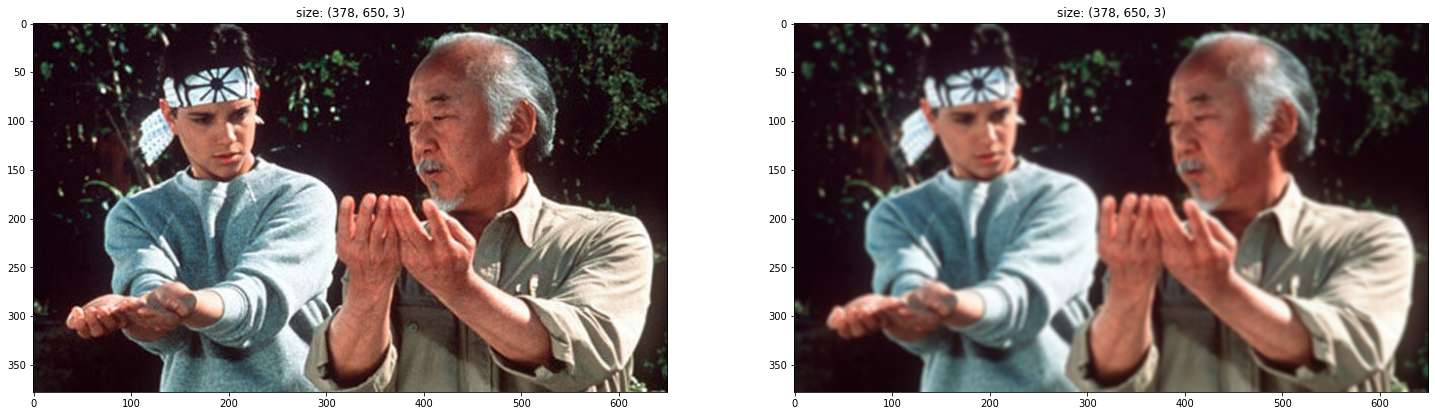

In [ ]:
#the box filter has a blur effect, which is not visible a lot with a filter 3x3. If we use a bigger filter, for example 10, the results of subsampling will be bad.
#also with 5x5 not good. With 3x3 ok, but the result has still a bit more loss than the result obtained through the pyramids.

boxed = cv2.boxFilter(image, 50, (5,5))
plt.figure(figsize=(25,8))
plt.subplot(121), plt.imshow(image), plt.title("size: " + str(image.shape))
plt.subplot(122), plt.imshow(boxed), plt.title("size: " + str(boxed.shape))

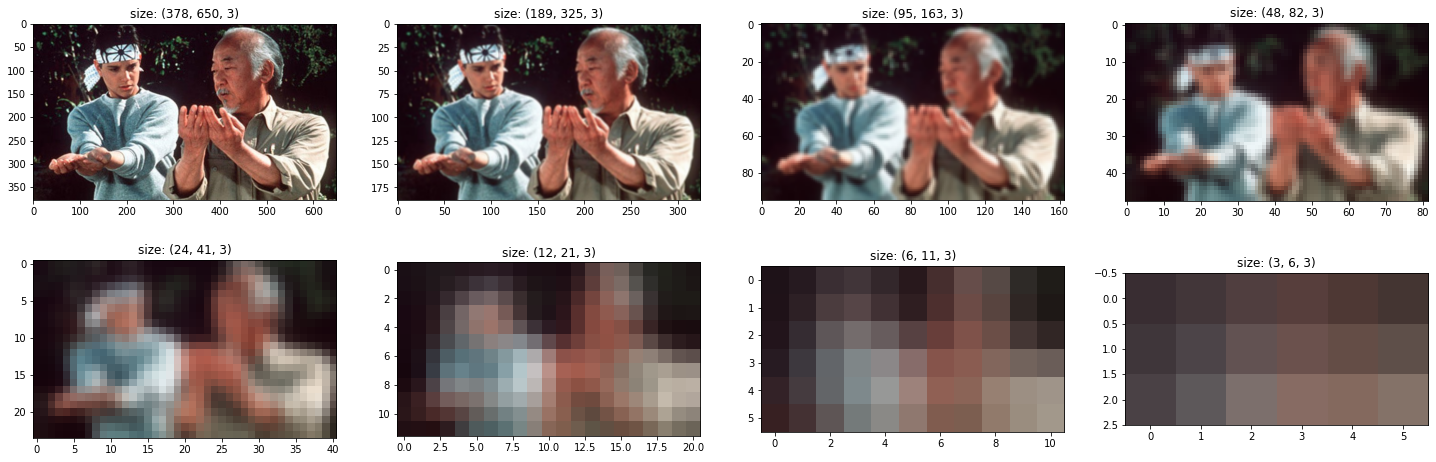

In [ ]:
def subsampling_box(img):
    boxed = cv2.boxFilter(img, 50, (5,5))
    sub = boxed[::2, ::2]
    return sub

imgg = image

subsampled = [image]

#in order to have 'numLevels' images at the end, we have to apply 'numLevels-1' times the fne subsampling_box
for i in range(numLevels-1):
    new = subsampling_box(imgg)
    subsampled.append(new)
    imgg = new

m=numLevels/4         
plt.figure(figsize=(25,8))
for i in range(len(subsampled)):
    plt.subplot(m,4,i+1), plt.imshow(subsampled[i]), plt.title("size: " + str(subsampled[i].shape))  #4 images per row in this subplotting
plt.show()

###Naive###
(implemented only in order to compare the performances wrt loss)

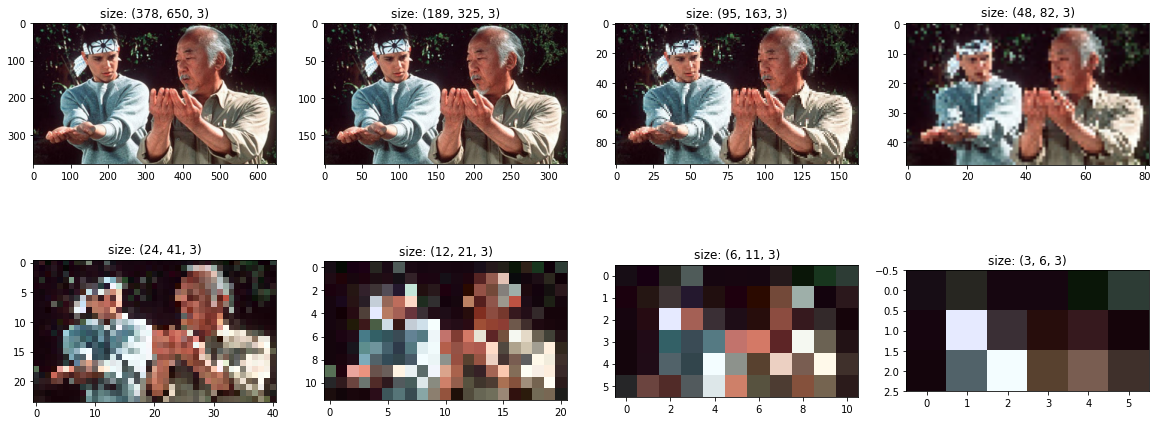

In [ ]:
#differently from the subsampling done ecploiting the box filter, 
#here we don't apply the blurring filter before cutting off half 
#of the cols and the rows. The results in fact is worst.

def subsampling_box(img):
    sub = img[::2, ::2]
    return sub

imgg = image

subsampled = [image]

#in order to have 'numLevels' images at the end, we have to apply 'numLevels-1' times the fne subsampling_box
for i in range(numLevels-1):
    new = subsampling_box(imgg)
    subsampled.append(new)
    imgg = new

m=numLevels/4         
plt.figure(figsize=(20,8))
for i in range(len(subsampled)):
    plt.subplot(m,4,i+1), plt.imshow(subsampled[i]), plt.title("size: " + str(subsampled[i].shape))  #4 images per row in this subplotting
plt.show()